In [1]:
# importera bibliotek
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# skapa dataframes och läs in väder- och försäljningsdata
# OBS! Ändra namnet på filen för försäljningsdata som läses in!
df_sales = pd.read_csv('SumUp-SalesReport_7.7.2023-13.8.2023.csv')
df_weather = pd.read_csv('FMI-WeatherData_7.7.2023-13.8.2023.csv')

In [3]:
# formatera datum och tid
df_sales['Date'] = pd.to_datetime(df_sales['Date']) # formatera datum (försäljning)
df_weather['Date'] = pd.to_datetime(df_weather[['Year', 'Month', 'Day']]) # skapa ny kolumn för formaterat datum (väder)
df_weather['Time'] = pd.to_datetime(df_weather['Time [Local time]'], format='%H:%M').dt.time # skapa ny kolumn för formaterad tid (väder)

In [4]:
# skapa filtrerad vädertabell för ungefärliga öppethållningstider (11:00-20:00)
filtered_weather = df_weather[(df_weather['Time'] >= pd.to_datetime('11:00').time()) & 
                              (df_weather['Time'] <= pd.to_datetime('20:00').time())]

In [5]:
# skapa pivottabeller
# 1. total försäljning/dag
sales_pivot = df_sales.pivot_table(
    values='Price (Gross)',
    index='Date',
    aggfunc='sum'
)
# 2. medeltemperatur/dag under öppethållningstider
weather_pivot = filtered_weather.pivot_table(
    values='Air temperature [°C]',
    index='Date',
    aggfunc='mean'
)

In [6]:
# kombinera pivottabeller enligt datum
merged_data = pd.merge(sales_pivot, weather_pivot, on='Date')

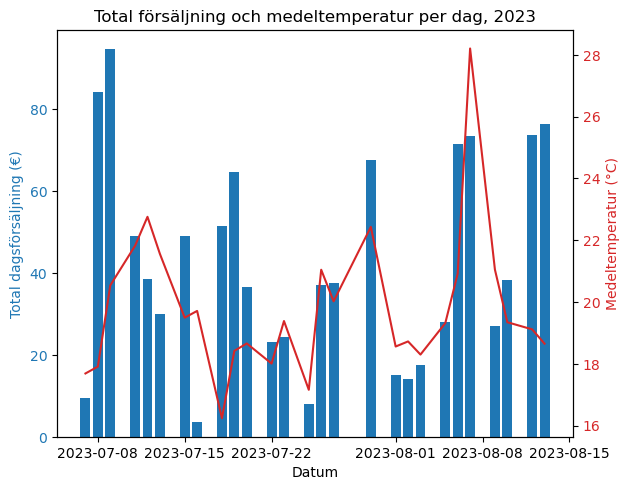

In [7]:
# visualisera tabellerna i en gemensam graf
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Datum')
ax1.set_ylabel('Total dagsförsäljning (€)', color=color)
ax1.bar(merged_data.index, merged_data['Price (Gross)'], color=color, width=0.8)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Medeltemperatur (°C)', color=color)
ax2.plot(merged_data.index, merged_data['Air temperature [°C]'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title("Total försäljning och medeltemperatur per dag, 2023")
plt.show()

In [8]:
# deskriptiv statistik (datapunkter, medelvärde, standardavvikelse, minimivärde, maximivärde och kvartiler)
merged_data.describe()

,Price (Gross),Air temperature [°C]
count,27.000000,27.000000
mean,42.296296,19.813202
std,25.589496,2.320275
min,3.500000,16.236364
25%,23.625000,18.486886
50%,37.500000,19.343636
75%,66.000000,20.978182
max,94.500000,28.201818


In [9]:
# korrelationen mellan försäljning och medeltemperatur
merged_data.corr()

,Price (Gross),Air temperature [°C]
Price (Gross),1.000000,0.303848
Air temperature [°C],0.303848,1.000000


In [10]:
# samvariansen mellan försäljning och medeltemperatur 
merged_data.cov()

,Price (Gross),Air temperature [°C]
Price (Gross),654.822293,18.040876
Air temperature [°C],18.040876,5.383675
